# ANALYZE EXPERIMENTS

In [1]:
import smarte.constants as cn
import smarte as smt
from smarte.analysis.anova import Anova
from smarte.analysis.error_analyzer import ErrorAnalyzer

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from io import StringIO
import zipfile

# Defintitions

* **Log error ratio of a parameter estimate**, $e$. Let $p$ be the true value of a positive valued parameter and $\hat{p}$ be its estimated value.
$e = log_2 \frac{\hat{p}}{p}$.

# Helpers

# Data Overview

In [2]:
PROVIDER = smt.ExperimentProvider()
DF = PROVIDER.df
DF.head()

,level_0,index,num_species,num_reaction,num_parameter,biomodel_num,columns_deleted,max_fev,method,noise_mag,...,max_logerr,min_logerr,rssq,avg_time,cnt,tot_time,status,min_frcerr,median_frcerr,max_frcerr
0,0,0.0,12,17,35,1,0,10000,differential_evolution,0.1,...,0.998418,0.0481603,2.14184e-07,0.000183846,1087,0.19984,Success!,0.0339456,0.41441,0.997808
1,1,1.0,12,17,35,1,0,10000,differential_evolution,0.1,...,0.999678,0.00215375,2.14184e-07,0.000200367,1087,0.217799,Success!,0.00149398,0.248903,0.999553
2,2,2.0,12,17,35,1,0,10000,differential_evolution,0.1,...,-0.999708,0.0830521,2.14184e-07,0.00019651,1087,0.213606,Success!,0.0592566,0.452335,-0.499899
3,3,3.0,12,17,35,1,0,10000,differential_evolution,0.1,...,0.999888,0.125898,2.14184e-07,0.000194252,1087,0.211152,Success!,0.0911868,-0.105634,0.999845
4,4,4.0,12,17,35,1,0,10000,differential_evolution,0.1,...,0.999691,-0.00270371,2.14184e-07,0.000187535,1087,0.20385,Success!,-0.00187232,0.267849,0.999571


In [3]:
len(DF)

263632

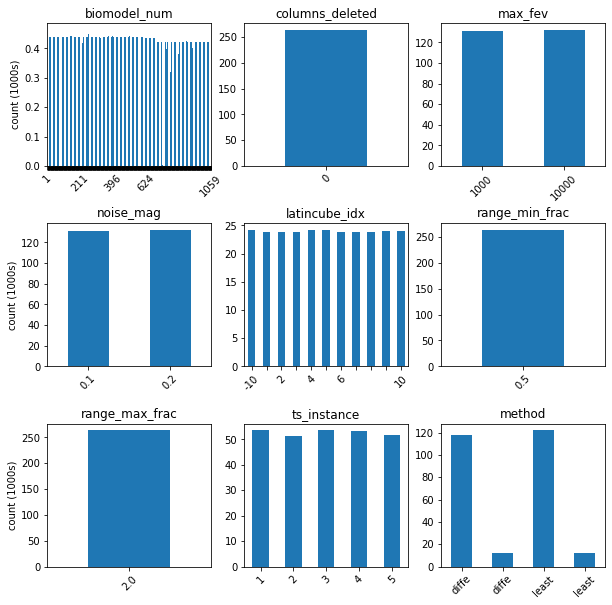

In [4]:
PROVIDER.plotFactorCounts(exclude_factors=[])

# Best latincube

In [14]:
dfs[0]

,level_0,num_species,num_reaction,num_parameter,biomodel_num,columns_deleted,max_fev,method,noise_mag,latincube_idx,...,max_logerr,min_logerr,rssq,avg_time,cnt,tot_time,status,min_frcerr,median_frcerr,max_frcerr
0,119986,12,17,35,1,0,1000,differential_evolution_blc,0.1,-1,...,0.999112,-0.0206184,2.14184e-07,0.000195161,1001,0.195356,Success!,-0.0141899,0.1358,0.998769
1,126059,12,17,35,1,0,1000,differential_evolution_blc,0.1,-1,...,-0.997113,-0.0222708,2.16817e-07,0.000197571,1001,0.197768,Success!,-0.0153184,0.336453,-0.498998
2,130085,12,17,35,1,0,1000,differential_evolution_blc,0.1,-1,...,1,0.0933718,2.15635e-07,0.00017746,1001,0.177638,Success!,0.0668607,0.168424,0.999999
3,136138,12,17,35,1,0,1000,differential_evolution_blc,0.1,-1,...,0.999966,0.0394098,2.13801e-07,0.000178363,1001,0.178542,Success!,0.0276933,0.178867,0.999953
4,142207,12,17,35,1,0,1000,differential_evolution_blc,0.1,-1,...,0.999966,0.0394098,2.14773e-07,0.000196462,1001,0.196658,Success!,0.0276933,0.178867,0.999953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24246,39464,10,21,23,1059,0,10000,leastsq_blc,0.2,-1,...,0.999987,-0.00997043,0.00031438,0.000201082,514,0.103356,Success!,-0.00688715,0.144421,0.999981
24247,42521,10,21,23,1059,0,10000,leastsq_blc,0.2,-1,...,-0.999791,0.00686432,0.000364148,0.000246319,1074,0.264546,Success!,0.00476932,-0.0539909,-0.499927
24248,45568,10,21,23,1059,0,10000,leastsq_blc,0.2,-1,...,-1,-0.000291094,0.000371928,0.000233924,645,0.150881,Success!,-0.000201751,-0.000656384,-0.5
24249,48618,10,21,23,1059,0,10000,leastsq_blc,0.2,-1,...,1,-0.00765158,0.000345972,0.000248874,395,0.0983054,Success!,-0.00528963,-0.0189812,0.999999


In [15]:
# Extend the data to all number of latincubes
dfs = []
for num_latincube in range(1, 11):
    dfs.append(PROVIDER.calcBestLatincubeFits(num_latincube=num_latincube))
dfs.append(PROVIDER.df)
DF = pd.concat(dfs)

In [28]:
BLC_DF.groupby(cn.SD_LATINCUBE_IDX).groups

{-10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], -9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], -8: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5

In [45]:
dct = {}
for num in range(1, 11):
    for mdl in DF[cn.SD_BIOMODEL_NUM].unique():
        num_latincube = -num
        BLC_DF = DF[DF[cn.SD_LATINCUBE_IDX] < 0][[cn.SD_LATINCUBE_IDX, cn.SD_MEDIAN_FRCERR]]
        df = BLC_DF[BLC_DF[cn.SD_LATINCUBE_IDX] == num_latincube]
        dct[num_latincube] = df[cn.SD_MEDIAN_FRCERR].mean()

In [46]:
dct

{-1: 0.1502325789373506,
 -2: 0.1422520851324934,
 -3: 0.13599798007763617,
 -4: 0.1388907410215938,
 -5: 0.14290369471244663,
 -6: 0.14340678618715913,
 -7: 0.1437843801644334,
 -8: 0.14340124057199097,
 -9: 0.14437751358842063,
 -10: 0.1421888116929253}

In [63]:
# Identify models that have a small variation in RSSQ across latincube indices and a large variation in median error
# Construct a scatter plot of models. x-axis is std of variation of RSSQ; y-axis is std median error
# Unclear how I normalize for the units of species.

BLC_DF = DF[DF[cn.SD_LATINCUBE_IDX] < 0][[cn.SD_LATINCUBE_IDX, cn.SD_MEDIAN_FRCERR, cn.SD_BIOMODEL_NUM, cn.SD_RSSQ]]
dfg = BLC_DF.groupby([cn.SD_LATINCUBE_IDX, cn.SD_BIOMODEL_NUM])
# Construct a dataframe indexed by Biomodel Num with columns for cv, std
biomodel_nums = []
rssq_stds = []
median_frcerr_stds = []
for (latincube_idx, biomodel_num), idxs in dfg.groups.items():
    dff = BLC_DF.loc[idxs, [cn.SD_RSSQ, cn.SD_MEDIAN_FRCERR]]
    biomodel_nums.append(biomodel_num)
    rssq_stds.append(dff[cn.SD_RSSQ].std())
    median_frcerr_stds.append(dff[cn.SD_MEDIAN_FRCERR].std())

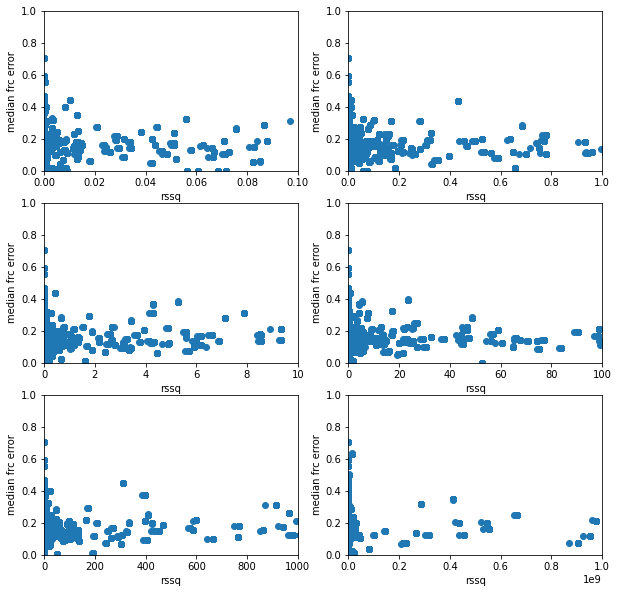

In [70]:
nrow = 3
ncol = 2
_, axes = plt.subplots(nrow, ncol, figsize=(10, 10))
icol = 0
irow = 0
for xupper in [0.1, 1, 10, 100, 1e3, 1e9]:
    ax = axes[irow, icol]
    ax.scatter(rssq_stds, median_frcerr_stds)
    ax.set_xlim([0, xupper])
    ax.set_xlabel("rssq")
    ax.set_ylabel("median frc error")
    ax.set_ylim([0, 1])
    icol += 1
    if icol >= ncol:
        icol = 0
        irow += 1

# H: Accuracy increases with the number of function evaluations

In [6]:
cn.SD_CONDITIONS

['biomodel_num',
 'columns_deleted',
 'max_fev',
 'method',
 'noise_mag',
 'latincube_idx',
 'range_min_frac',
 'range_max_frac',
 'ts_instance']

In [7]:
CONDITION_DCT = {}
for factor in cn.SD_CONDITIONS:
    CONDITION_DCT[factor] = list(set(DF[factor]))

AttributeError: module 'smarte.constants' has no attribute 'SD_MEDIAN_ERR'

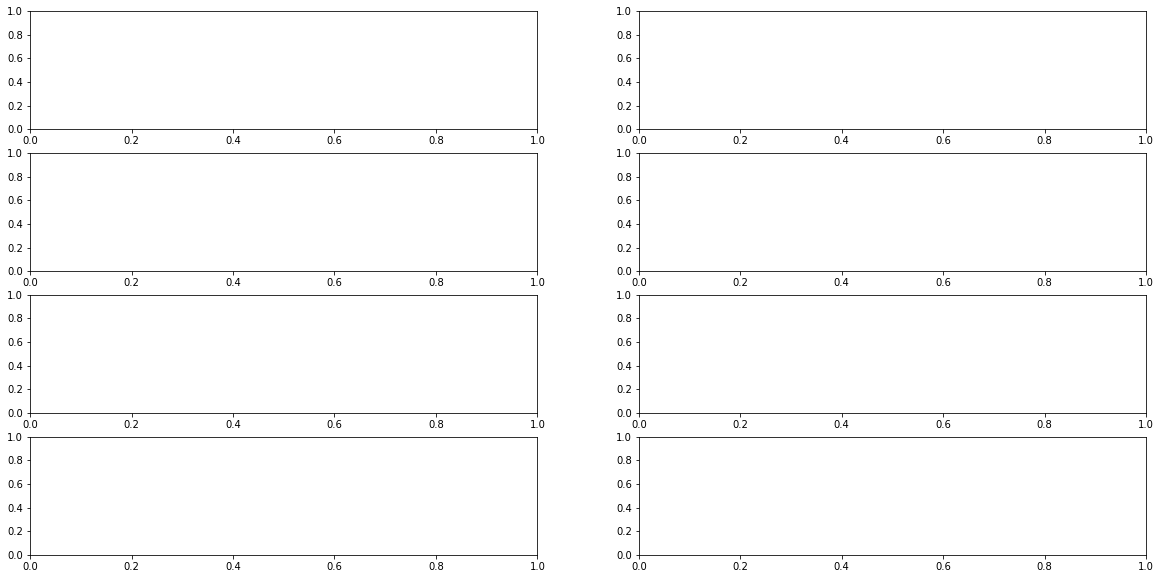

In [8]:
# Plot different conditions to see if there's an effect
factors = [cn.SD_MAX_FEV, cn.SD_LATINCUBE_IDX]
num_row = 4
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(20, 10))
irow = 0
icol = 0
for factor in factors:
    for noise_mag in CONDITION_DCT[cn.SD_NOISE_MAG]:
        for method in CONDITION_DCT[cn.SD_METHOD]:
            ax = axes[irow, icol]
            icol += 1
            df = DF[DF[cn.SD_NOISE_MAG] == noise_mag]
            df = df[df[cn.SD_METHOD] == method]
            title_prefix = "noise_mag: %2.2f, method: %s, " % (noise_mag, method)
            Anova.plotSl(df, factor, cn.SD_TS_INSTANCE, cn.SD_MEDIAN_ERR, is_plot=False, title_prefix=title_prefix, ax=ax)
            if irow >= num_row - 1:
                pass
            else:
                ax.set_xlabel("")
                ax.set_xticklabels([])
            if icol >= num_col:
                icol = 0
                irow += 1
plt.show()

In [ ]:
# Plot different conditions to see if there's an effect
num_row = 4
num_col = 2
fig, axes = plt.subplots(num_row, num_col, figsize=(20, 10))
irow = 0
icol = 0
for factor in factors:
    for noise_mag in CONDITION_DCT[cn.SD_NOISE_MAG]:
        for method in CONDITION_DCT[cn.SD_METHOD]:
            ax = axes[irow, icol]
            icol += 1
            df = DF[DF[cn.SD_NOISE_MAG] == noise_mag]
            df = df[df[cn.SD_METHOD] == method]
            ser = df[cn.SD_MEDIAN_ERR]
            title = "noise_mag: %2.2f, method: %s, " % (noise_mag, method)
            analyzer = ErrorAnalyzer(ser)
            analyzer.hist(ax=ax, title=title, is_plot=False, bins=100)
            if irow >= num_row - 1:
                pass
            else:
                ax.set_xlabel("")
                ax.set_xticklabels([])
            if icol >= num_col:
                icol = 0
                irow += 1
plt.show()

**Questions**
1. What is the decrease in median error by using the best latincube_idx? Let $\bar{e}$ be the median error ratio averaged across all
latincube_idx and let $e^{\star}$ be the (log2) median error ratio for the minimum residual sum of squares. Plot $|\bar{e}| - |e^{\star}|$ for factor levels of noise_mag, method, and max_fev.
1. Let $e^{\star}_k$ be the error resulting from using estimates for the lowest rssq for $k$ latincubes. Plot these two ($k$ is x-axis).
1. How does the number of parameters influence the above curve?

# H: Number of random restarts is more effective if there are fewer parameters to estimate.

# Analyze variability by replication

In [ ]:
dfg = DF.groupby(cn.SD_BIOMODEL_NUM)
mean_df = pd.DataFrame(dfg.mean().compute())
std_df = pd.DataFrame(dfg.std().compute())
cv_df = pd.DataFrame(cnt_std/cnt_mean)

In [ ]:
plt.hist(cv_df[cn.SD_CNT])
_ = plt.title("CV of Count of Function Evaluations")

In [ ]:
_ = plt.hist(mean_df[cn.SD_CNT], bins=100, cumulative=True, density=True)
_ = plt.title("Mean Number of Function Evaluations")

In [ ]:
_ = plt.hist(mean_df[cn.SD_MEDIAN_ERR], bins=100, cumulative=True, density=True)
_ = plt.title("Median Log2 Actual/True")

In [ ]:
plt.scatter(mean_df[cn.SD_MEDIAN_ERR], mean_df[cn.SD_CNT])
plt.xlabel("median err")
plt.ylabel("function evaluations")